# SQL for Data Analysis
<hr>

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL-Joins" data-toc-modified-id="SQL-Joins-1">SQL Joins</a></span><ul class="toc-item"><li><span><a href="#Database-Normalization" data-toc-modified-id="Database-Normalization-1.1">Database Normalization</a></span></li><li><span><a href="#JOINS-(INNER-JOINS)" data-toc-modified-id="JOINS-(INNER-JOINS)-1.2">JOINS (INNER JOINS)</a></span></li><li><span><a href="#Primary-Keys-&amp;-Foreign-Keys" data-toc-modified-id="Primary-Keys-&amp;-Foreign-Keys-1.3">Primary Keys &amp; Foreign Keys</a></span></li><li><span><a href="#JOIN-More-than-Two-Tables" data-toc-modified-id="JOIN-More-than-Two-Tables-1.4">JOIN More than Two Tables</a></span></li><li><span><a href="#ALIAS" data-toc-modified-id="ALIAS-1.5">ALIAS</a></span></li><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-1.6">Practice Questions</a></span></li></ul></li><li><span><a href="#TYPES-of-JOINs" data-toc-modified-id="TYPES-of-JOINs-2">TYPES of JOINs</a></span><ul class="toc-item"><li><span><a href="#JOIN-syntax" data-toc-modified-id="JOIN-syntax-2.1">JOIN syntax</a></span></li><li><span><a href="#A-LEFT-JOIN" data-toc-modified-id="A-LEFT-JOIN-2.2">A LEFT JOIN</a></span></li><li><span><a href="#LEFT-JOIN-RESULT" data-toc-modified-id="LEFT-JOIN-RESULT-2.3">LEFT JOIN RESULT</a></span></li><li><span><a href="#A-RIGHT-JOIN" data-toc-modified-id="A-RIGHT-JOIN-2.4">A RIGHT JOIN</a></span></li><li><span><a href="#RIGHT-JOIN-RESULT" data-toc-modified-id="RIGHT-JOIN-RESULT-2.5">RIGHT JOIN RESULT</a></span></li><li><span><a href="#Practice-Questions" data-toc-modified-id="Practice-Questions-2.6">Practice Questions</a></span></li></ul></li><li><span><a href="#Recap" data-toc-modified-id="Recap-3">Recap</a></span><ul class="toc-item"><li><span><a href="#Primary-and-Foreign-Keys" data-toc-modified-id="Primary-and-Foreign-Keys-3.1">Primary and Foreign Keys</a></span></li><li><span><a href="#JOINs" data-toc-modified-id="JOINs-3.2">JOINs</a></span></li><li><span><a href="#Alias" data-toc-modified-id="Alias-3.3">Alias</a></span></li></ul></li></ul></div>

## SQL Joins

### Database Normalization

>Database normalization, or data normalization, is a technique to organize the contents of the 
tables for transactional databases and data warehouses.

When you normalize a database, you have four goals: arranging data into logical groupings such 
that each group describes a small part of the whole; minimizing the amount of duplicate data 
stored in a database; organizing the data such that, when you modify it, you make the change 
in only one place; and building a database in which you can access and manipulate the data 
quickly and efficiently without compromising the integrity of the data in storage. Click <a href='https://www.itprotoday.com/sql-server/sql-design-why-you-need-database-normalization'>here</a> for more info.

### JOINS (INNER JOINS)

>JOIN statements allow us to pull data from more than one table at a time. An inner join pulls rows only if they exist as a match across two tables.

>ON clauses specify a logical statement to combine the table in 'FROM' and 'JOIN' statements.

**Examples:**
1. Try pulling all the data from the accounts table, and all the data from the orders table.
```sql
SELECT orders.*, accounts.*
FROM accounts
JOIN orders
ON accounts.id = orders.account_id;
```
2. Try pulling standard_qty, gloss_qty, and poster_qty from the orders table, 
and the website and the primary_poc from the accounts table.
```sql
SELECT orders.standard_qty, orders.gloss_qty, 
       orders.poster_qty, accounts.website, 
       accounts.primary_poc
FROM orders
JOIN accounts
ON orders.account_id = accounts.id;
```

<i>Note: The result is the same when you switched the tables in the FROM and JOIN. 
      Additionally, which side of the '=' a column is listed doesn't matter.
      The ON clause specifies the column on which you'd like to merge the two tables together</i>.

### Primary Keys & Foreign Keys

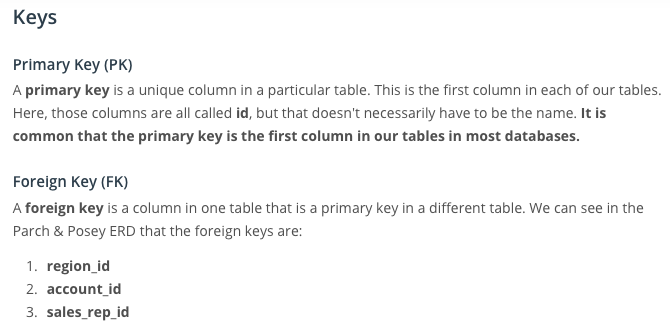

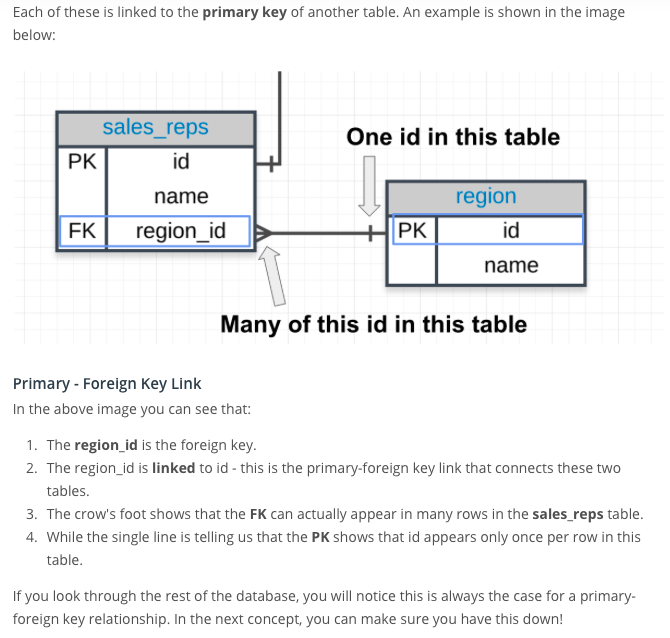

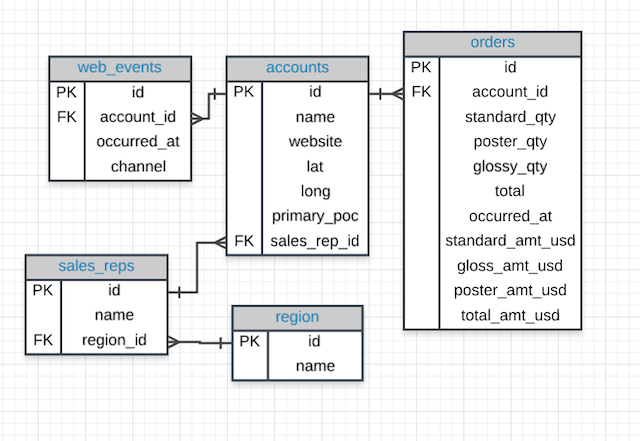

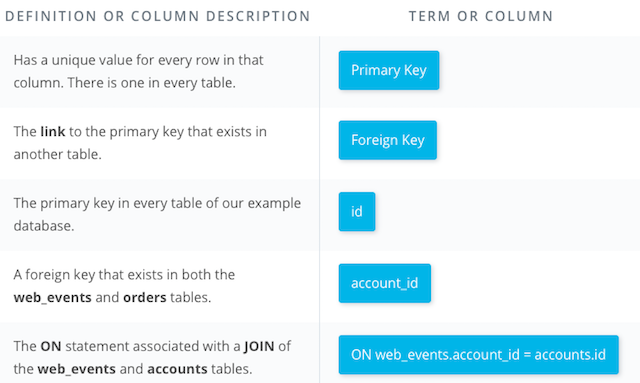

Q2. Select all that are true for primary keys.

    1. There is one and only one of these columns in every table.
    2. They are a column in a table.
    
Q3. Select all that are true of foreign keys.

    1. They are always linked to a primary key.
    2. In the above database, every foreign key is associated with the crow-foot notation, which suggests it can appear multiple times in the column of a table.

### JOIN More than Two Tables

**Example (refer to ERD above):**
```sql   
SELECT *
FROM web_events
JOIN accounts
ON web_events.account_id = accounts.id
JOIN orders
ON accounts.id = orders.account_id
```    
To pull only specific columns replace the SELECT statement as follows:
```sql    
SELECT web_events.channel, accounts.name, orders.total
```

### ALIAS

>+ Give table names alias when performing joins
>+ The alias for a table will be created in the FROM or JOIN clauses.
>+ You can now use the alias to replace the table name throughout the rest of the query.

### Practice Questions

**Note:** <i>Use the ERD above for reference</i>

1. Provide a table for all web_events associated with account name of Walmart. There should 
   be three columns. Be sure to include the primary_poc, time of the event, and the channel 
   for each event. Additionally, you might choose to add a fourth column to assure only 
   Walmart events were chosen.
```sql  
SELECT a.primary_poc, w.occurred_at, w.channel, a.name
FROM web_events w
JOIN accounts a
ON w.account_id = a.id
WHERE a.name = 'Walmart';
```
2. Provide a table that provides the region for each sales_rep along with their associated 
   accounts. Your final table should include three columns: the region name, the sales rep        name, and the account name. Sort the accounts alphabetically (A-Z) according to account        name. 
```sql   
SELECT r.name region, s.name rep, a.name account
FROM sales_reps s
JOIN region r
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
ORDER BY a.name;
```    
3. Provide the name for each region for every order, as well as the account name and the unit 
   price they paid (total_amt_usd/total) for the order. Your final table should have 3 
   columns: region name, account name, and unit price. A few accounts have 0 for total, so I 
   divided by (total + 0.01) to assure not dividing by zero.
```sql   
SELECT r.name region, a.name account, 
       o.total_amt_usd/(o.total + 0.01) unit_price
FROM region r
JOIN sales_reps s
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
JOIN orders o
ON o.account_id = a.id;
```

## TYPES of JOINs

>If we want to include data that doesn't exist in both tables, but only in one of the two tables we are using in our joint statement, there are three types of joints we might use: a left join, a right join, and a full outer join.

>Each of these joints will provide all the resulting rows of an inner join, but we may also gain some additional rows.

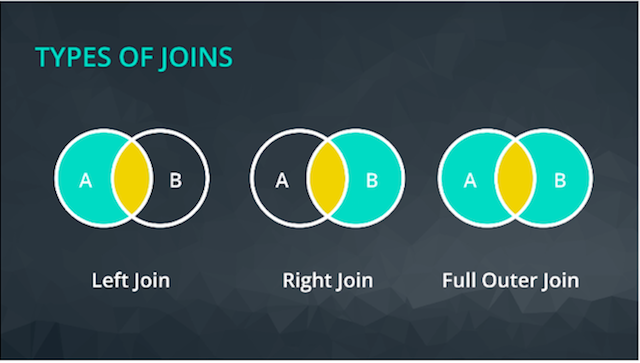

### JOIN syntax

>LEFT OUTER JOIN, RIGHT OUTER JOIN, and FULL OUTER JOIN are the exact same commands as LEFT JOIN, RIGHT JOIN, and OUTER JOIN.

>The outer join will return the inner join result set, as well as any unmatched rows from either of the two tables being joined.

### A LEFT JOIN 

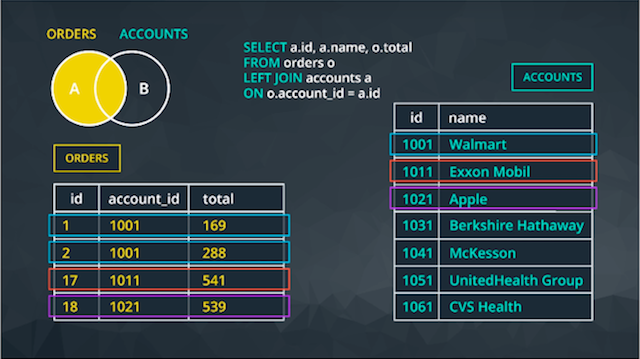

### LEFT JOIN RESULT

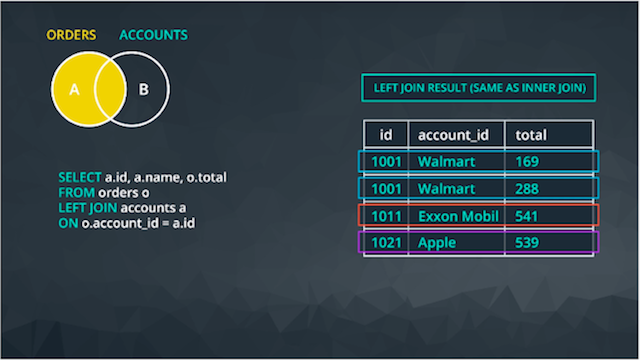

### A RIGHT JOIN

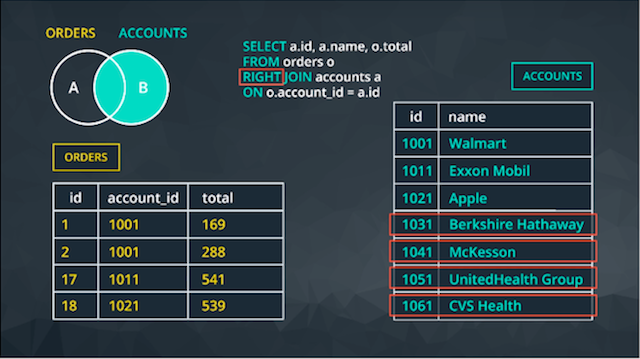

### RIGHT JOIN RESULT

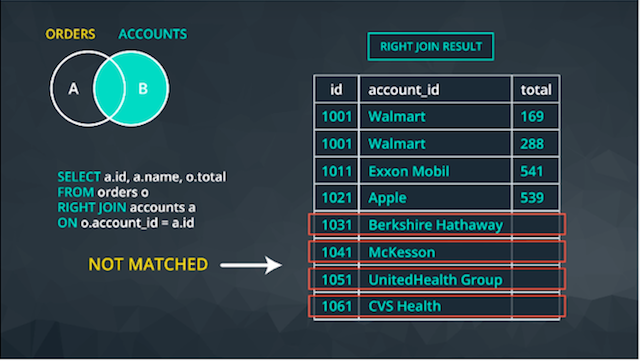

<i>**Note:** If the table names in the FROM and JOIN statements are switched around, a LEFT JOIN will result in the same table as the RIGHT JOIN shown above</i>.

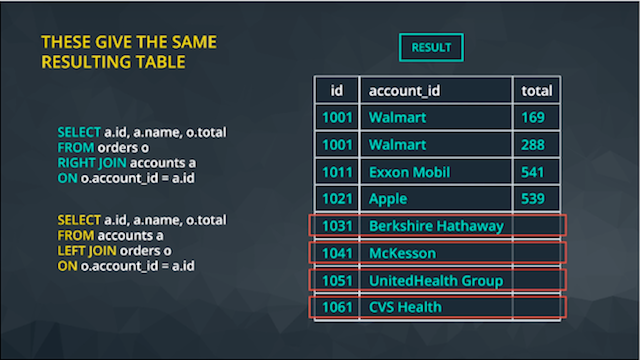

1. Logic in the ON clause reduces the rows before combining the tables.

2. Logic in the WHERE clause occurs after the JOIN occurs.

### Practice Questions 

**Note:** <i>Use the ERD above for reference</i>

1. Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.
```sql
SELECT r.name region, s.name rep, a.name account
FROM sales_reps s
JOIN region r
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
WHERE r.name = 'Midwest'
ORDER BY a.name;
```    
2. Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for accounts where the sales rep has a first name starting with S and in the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.
```sql
SELECT r.name region, s.name rep, a.name account
FROM sales_reps s
JOIN region r
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
WHERE r.name = 'Midwest' AND s.name LIKE 'S%'
ORDER BY a.name;
```    
3. Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for accounts where the sales rep has a last name starting with K and in the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.
```sql
SELECT r.name region, s.name rep, a.name account
FROM sales_reps s
JOIN region r
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
WHERE r.name = 'Midwest' AND s.name LIKE '% K%'
ORDER BY a.name;
```    
4. Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100. Your final table should have 3 columns: region name, account name, and unit price. In order to avoid a division by zero error, adding .01 to the denominator here is helpful total_amt_usd/(total+0.01). 
```sql
SELECT r.name region, a.name account, 
       o.total_amt_usd/(o.total + 0.01) unit_price
FROM region r
JOIN sales_reps s
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
JOIN orders o
ON o.account_id = a.id
WHERE o.standard_qty > 100;
```    
5. Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100 and the poster order quantity exceeds 50. Your final table should have 3 columns: region name, account name, and unit price. Sort for the smallest unit price first. In order to avoid a division by zero error, adding .01 to the denominator here is helpful (total_amt_usd/(total+0.01). 
```sql
SELECT r.name region, a.name account, 
       o.total_amt_usd/(o.total + 0.01) unit_price
FROM region r
JOIN sales_reps s
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
JOIN orders o
ON o.account_id = a.id
WHERE o.standard_qty > 100 AND o.poster_qty > 50
ORDER BY unit_price;
```   
6. What are the different channels used by account id 1001? Your final table should have only 2 columns: account name and the different channels. You can try SELECT DISTINCT to narrow down the results to only the unique values.
```sql
SELECT DISTINCT a.name, w.channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
WHERE a.id = '1001';
```
7. Find all the orders that occurred in 2015. Your final table should have 4 columns: occurred_at, account name, order total, and order total_amt_usd.
```sql
SELECT o.occurred_at, a.name, o.total, o.total_amt_usd
FROM accounts a
JOIN orders o
ON o.account_id = a.id
WHERE o.occurred_at BETWEEN '01-01-2015' AND '01-01-2016'
ORDER BY o.occurred_at DESC;
```

## Recap
### Primary and Foreign Keys
You learned a key element for JOINing tables in a database has to do with primary and foreign keys:

primary keys - are unique for every row in a table. These are generally the first column in our database (like you saw with the id column for every table in the Parch & Posey database).

foreign keys - are the primary key appearing in another table, which allows the rows to be non-unique.
Choosing the set up of data in our database is very important, but not usually the job of a data analyst. This process is known as Database Normalization.

### JOINs
In this lesson, you learned how to combine data from multiple tables using JOINs. The three JOIN statements you are most likely to use are:

1. JOIN - an INNER JOIN that only pulls data that exists in both tables.

2. LEFT JOIN - pulls all the data that exists in both tables, as well as all of the rows from the table in the FROM even if they do not exist in the JOIN statement.

3. RIGHT JOIN - pulls all the data that exists in both tables, as well as all of the rows from the table in the JOIN even if they do not exist in the FROM statement.

There are a few more advanced JOINs that we did not cover here, and they are used in very specific use cases. UNION and UNION ALL, CROSS JOIN, and the tricky SELF JOIN. These are more advanced than this course will cover, but it is useful to be aware that they exist, as they are useful in special cases.

### Alias
You learned that you can alias tables and columns using AS or not using it. This allows you to be more efficient in the number of characters you need to write, while at the same time you can assure that your column headings are informative of the data in your table.